# `Aula 1`
# `Conhecendo a base de dados`

### 1.1. Importando os dados


In [19]:
import pandas as pd

In [20]:
database = 'aluguel.csv'

df = pd.read_csv(
    database,
    sep=';'
)

df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [21]:
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [22]:
df.tail(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


### 1.2. Características gerais da base de dados

In [23]:
df.shape

(32960, 9)

In [24]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [26]:
# Visualizando uma coluna específica
df['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [27]:
df[['Bairro', 'Tipo', 'Valor', 'Area']]

,Bairro,Tipo,Valor,Area
0,Copacabana,Quitinete,1700.0,40
1,Jardim Botânico,Casa,7000.0,100
2,Barra da Tijuca,Conjunto Comercial/Sala,5200.0,150
3,Centro,Apartamento,800.0,15
4,Higienópolis,Apartamento,800.0,48
...,...,...,...,...
32955,Centro,Quitinete,800.0,27
32956,Jacarepaguá,Apartamento,1800.0,78
32957,São Francisco Xavier,Apartamento,1400.0,48
32958,Leblon,Apartamento,3000.0,70


# `Aula 2`
# `Análise exploratória de dados`

### 2.1. Qual o valor médio de aluguel por tipo de imóvel?

In [28]:
# Separando apenas as colunas que irei utilizar
tipo_valor = df[['Tipo', 'Valor']]
tipo_valor

,Tipo,Valor
0,Quitinete,1700.0
1,Casa,7000.0
2,Conjunto Comercial/Sala,5200.0
3,Apartamento,800.0
4,Apartamento,800.0
...,...,...
32955,Quitinete,800.0
32956,Apartamento,1800.0
32957,Apartamento,1400.0
32958,Apartamento,3000.0


In [29]:
# Agrupando valores por tipo e calculando a média por agrupamento
df.groupby('Tipo').mean(numeric_only=True)

# agrupando por uma coluna específica
df.groupby('Tipo')[['Valor']].mean()

,Valor
Tipo,
Apartamento,4744.614648
Box/Garagem,1899.756098
Casa,6793.454922
Casa Comercial,14478.264151
Casa de Condomínio,11952.061245
Casa de Vila,1574.369478
Chácara,4900.000000
Conjunto Comercial/Sala,14715.045521
Flat,4546.189076


In [30]:
# Agrupando valores por tipo e calculando a soma por agrupamento
df.groupby('Tipo')[['Valor']].sum()

,Valor
Tipo,
Apartamento,92638601.0
Box/Garagem,155780.0
Casa,6555684.0
Casa Comercial,3836740.0
Casa de Condomínio,11904253.0
Casa de Vila,392018.0
Chácara,4900.0
Conjunto Comercial/Sala,100209460.0
Flat,2163986.0


In [31]:
# Agrupando valores por tipo e calculando o número de reptições por agrupamento
df.groupby('Tipo')[['Valor']].count()

,Valor
Tipo,
Apartamento,19525
Box/Garagem,82
Casa,965
Casa Comercial,265
Casa de Condomínio,996
Casa de Vila,249
Chácara,1
Conjunto Comercial/Sala,6810
Flat,476


In [32]:
# Se quisermos com que a tabela seja mostrada em forma de DataFrame, basta colacar o mais um par de [] em ['Valor']
df.groupby('Tipo')[['Valor', 'Condominio', 'IPTU']].mean()

,Valor,Condominio,IPTU
Tipo,,,
Apartamento,4744.614648,1722.653697,686.170413
Box/Garagem,1899.756098,305.450000,125.846154
Casa,6793.454922,931.280952,1582.506394
Casa Comercial,14478.264151,1935.709677,1707.386740
Casa de Condomínio,11952.061245,1342.025527,3252.517730
Casa de Vila,1574.369478,138.768421,183.878788
Chácara,4900.000000,NaN,NaN
Conjunto Comercial/Sala,14715.045521,4512.218100,1399.596571
Flat,4546.189076,2027.720554,493.166667


In [33]:
# Podemos também ordenar esses valores com a função 'sort_values()'
df_valor_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

In [34]:
# Média de valores por bairro
df_valor_bairro = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor')

<Axes: ylabel='Tipo'>

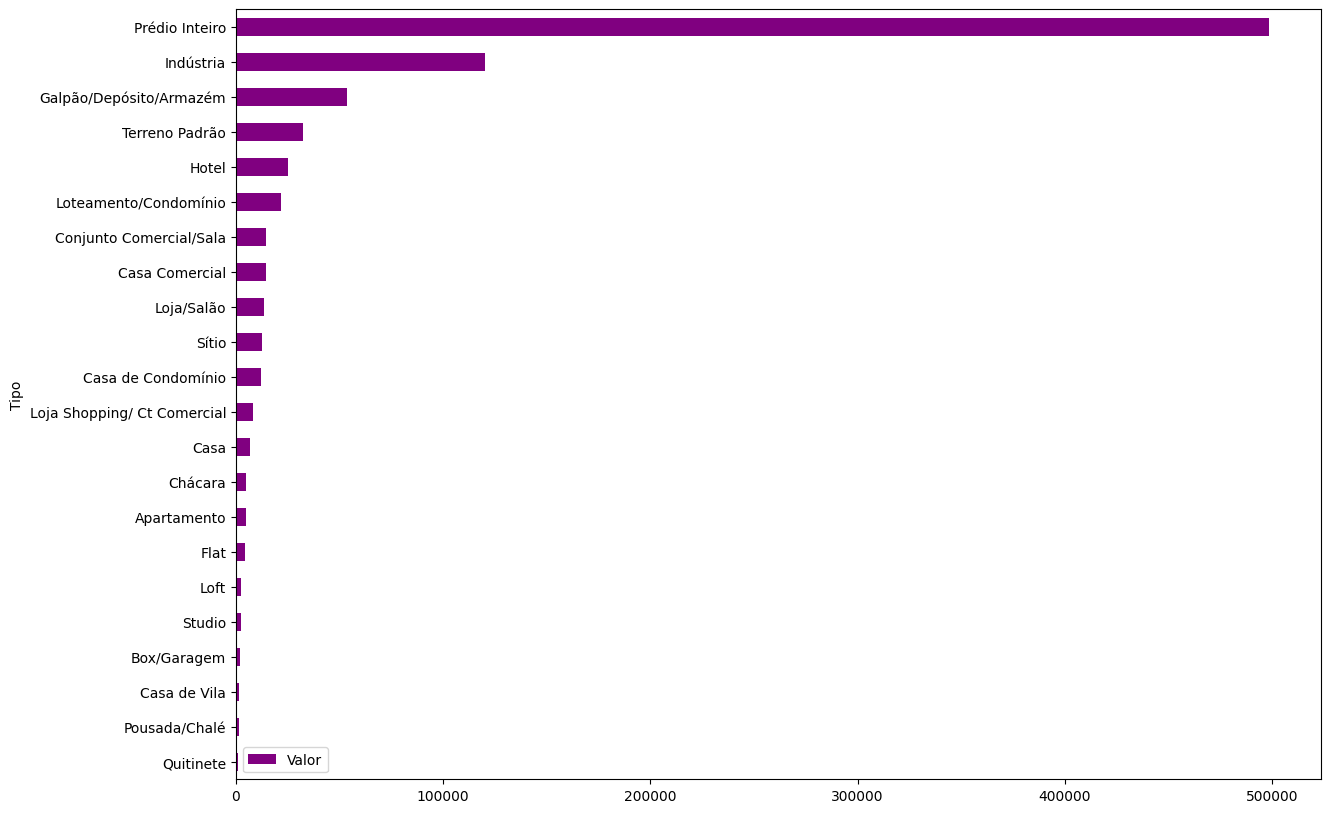

In [35]:
df_valor_tipo.plot(kind='barh', figsize=(14, 10), color='purple')

<Axes: ylabel='Bairro'>

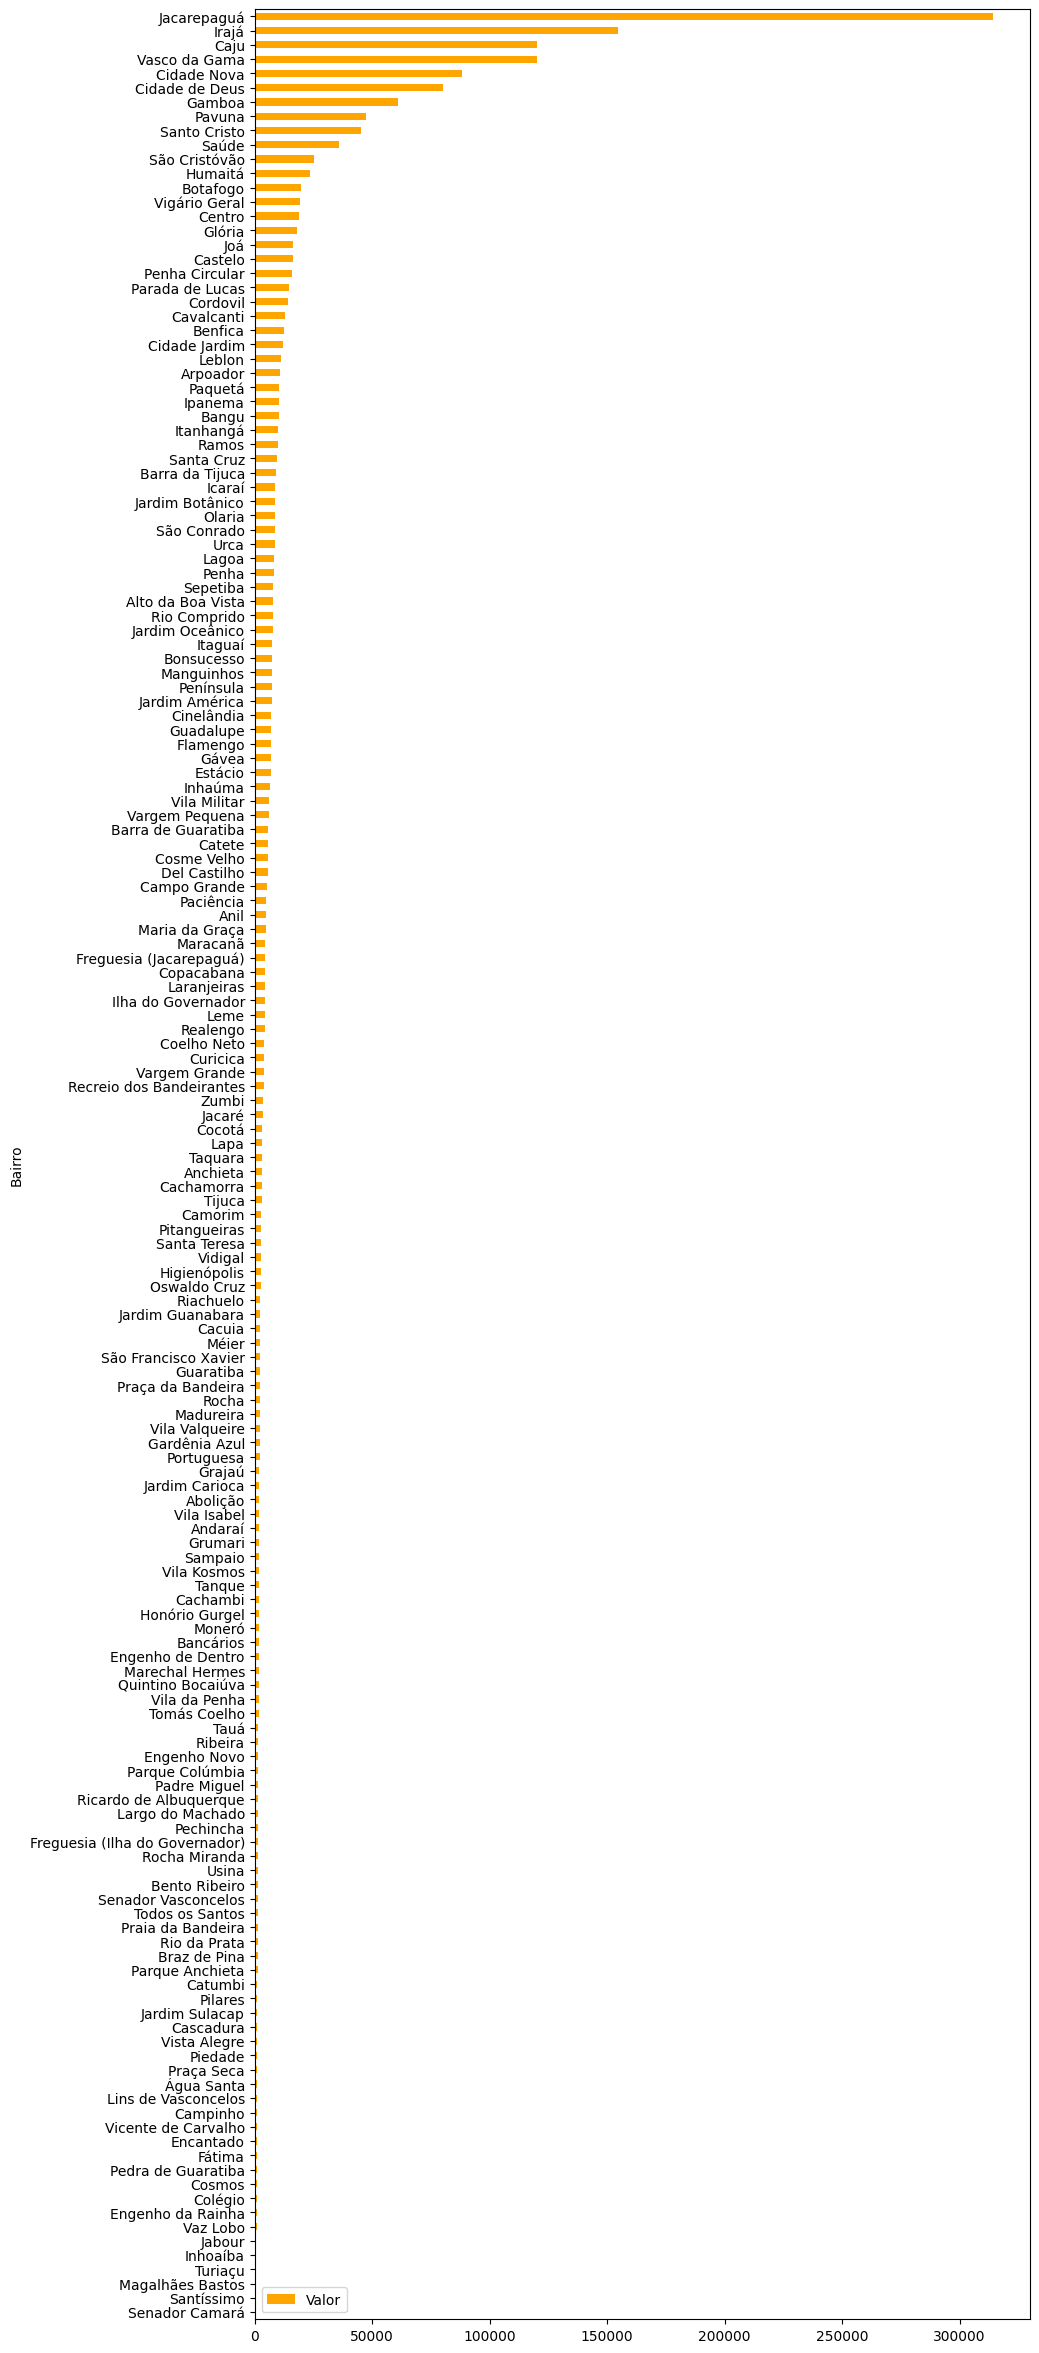

In [36]:
df_valor_bairro.plot(kind='barh', figsize=(10, 30), color='orange')

### 2.2. Removendo os imóveis comerciais

In [46]:
# fazenod um 'set' de um Series do nosso DataFrame
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [47]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']                                            

In [49]:
df.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


### 2.3. Qual o percentual de cada tipo de imóvel na nossa base de dados?

### 2.3. Selecionando apenas os imóveis do tipo apartamento

# `Aula 3` 
# `Tratando e filtrando os dados`

### 3.1. Lidando com dados nulos

### 3.2. Removendo registros

### 3.3. Filtros

3.3.1 Apartamentos que possuem **1 quarto** e **aluguel menor que 1200**



3.3.2. **Apartamentos** que possuem pelo menos **2 quartos**, **aluguel menor que 3000** e **area maior que 70**

### 3.4. Salvando os dados

# `Aula 4`
# `Manipulando os dados`

### 4.1. Criando colunas numéricas

### 4.2. Criando colunas categóricas